# Compare neuronal weights used to predict different behavior timescales

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_font_size

cc = np.concatenate

### Analyze fits to entire empirical population

In [7]:
df_ma_param = pd.read_csv('data/simple/neur/baker_ma_fit_param.csv')
tau_rs = df_ma_param['TAU_R']
tau_as = df_ma_param['TAU_A']
x_ss = df_ma_param['X_S']
x_ps = df_ma_param['X_P']

ma_mtn_fit_data = np.load(f'data/simple/mlv/neur_basic/baker_ma_nm91_zh23_mtn_ridge_alpha_10.npy', allow_pickle=True)[0]

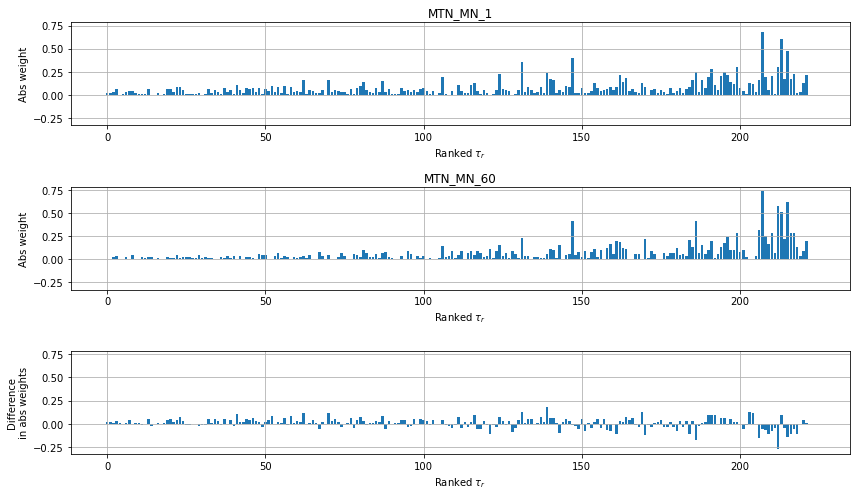

In [27]:
idxs_tau_r = np.argsort(tau_rs)

targs = ma_mtn_fit_data['targs'][1:]
w_mns = {}
fig, axs = plt.subplots(3, 1, figsize=(12, 7), sharey=True, tight_layout=True)
for ax, targ in zip(axs, targs):
    w_mn = ma_mtn_fit_data['w'][targ].mean(axis=0)
    ax.bar(np.arange(len(w_mn)), np.abs(w_mn)[idxs_tau_r])
    ax.set_xlabel(r'Ranked $\tau_r$')
    ax.set_ylabel(r'Abs weight')
    ax.set_title(targ)
    
    w_mns[targ] = w_mn
    
w_abs_diff = np.abs(w_mns[targs[0]]) - np.abs(w_mns[targs[1]])
axs[-1].bar(np.arange(len(w_mns[targs[0]])), w_abs_diff[idxs_tau_r])
axs[-1].set_xlabel(r'Ranked $\tau_r$')
axs[-1].set_ylabel('Difference\nin abs weights')

for ax in axs:
    ax.grid()

In [39]:
w_fast = w_mns[targs[0]]/np.linalg.norm(w_mns[targs[0]])
w_slow = w_mns[targs[1]]/np.linalg.norm(w_mns[targs[1]])

w_fast @ w_slow

0.881863533186847